In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1) Missing value

### Dropping missing values

In [2]:
name = ["john","jack","jill","kenny","kevin"]
math = [89,78,67,np.nan,85]
science = [78,75,np.nan,np.nan,76]

In [3]:
dict = {'name': name,'math':math,'science':science}

In [13]:
#convert into a data frame using pandas
df=pd.DataFrame(dict)

In [14]:
df

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,NaN
3,kenny,NaN,NaN
4,kevin,85.0,76.0


In [15]:
df.isnull()

,name,math,science
0,False,False,False
1,False,False,False
2,False,False,True
3,False,True,True
4,False,False,False


In [16]:
df.isnull().sum()

name       0
math       1
science    2
dtype: int64

In [17]:
#df.dropna(inplace=True) #it acutaly alters the original data base this way, if we remove inplace it doesn't alter the dataframe

In [19]:
df.dropna() #does not alter the original dataframe
 

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
4,kevin,85.0,76.0


In [20]:
df

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,NaN
3,kenny,NaN,NaN
4,kevin,85.0,76.0


In [34]:
cars = pd.read_csv('cars.csv')

In [35]:
cars.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [36]:
cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [37]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [38]:
cars['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [45]:
#cars["normalized-losses"].replace("?",cars["normalized-losses"].mean(),inplace=True) this will not work because can't find 
#the mean when there are '?' values

In [46]:
cars['normalized-losses'].replace('?',np.nan,inplace=True)

In [47]:
cars['normalized-losses']=cars['normalized-losses'].astype(float) #ensure all of the values are float as it has string values

In [48]:
cars['normalized-losses'].fillna(cars['normalized-losses'].mean(),inplace=True)

In [51]:
cars['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
88      6
62      6
101     6
160     6
114     6
84      5
97      5
102     5
145     5
82      5
76      5
111     4
92      4
123     4
86      4
90      3
73      3
85      3
207     3
182     3
121     3
152     3
112     2
56      2
161     2
156     2
94      2
52      2
?       2
162     2
155     2
184     2
100     2
176     2
55      1
262     1
134     1
115     1
140     1
48      1
58      1
60      1
78      1
135     1
200     1
64      1
120     1
72      1
154     1
288     1
143     1
142     1
175     1
106     1
Name: horsepower, dtype: int64

In [58]:
cars["horsepower"].replace("?",np.nan,inplace=True)

In [59]:
cars["horsepower"] = cars["horsepower"].astype(float)

In [60]:
cars["horsepower"].fillna(cars["horsepower"].mean(),inplace=True)

In [61]:
cars['horsepower'].head(20)

0     111.0
1     111.0
2     154.0
3     102.0
4     115.0
5     110.0
6     110.0
7     110.0
8     140.0
9     160.0
10    101.0
11    101.0
12    121.0
13    121.0
14    121.0
15    182.0
16    182.0
17    182.0
18     48.0
19     70.0
Name: horsepower, dtype: float64

# 2)remove outliers

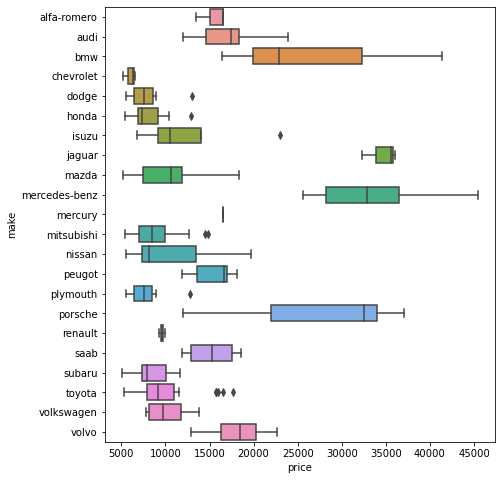

In [62]:
plt.figure(figsize=(7,8))
sns.boxplot(data=cars,x="price",y="make")
plt.show() 
#outliers are showing in the next graph: for isuzu: there is an outlier with price above  20000

In [63]:
cars[(cars['make']== 'isuzu') & (cars['price'] > 20000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [64]:
cars.drop(45,inplace=True)

In [65]:
cars[(cars["make"]=="plymouth") & (cars["price"] > 12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [66]:
cars.drop(124,inplace=True)
#we can do the same for the rest

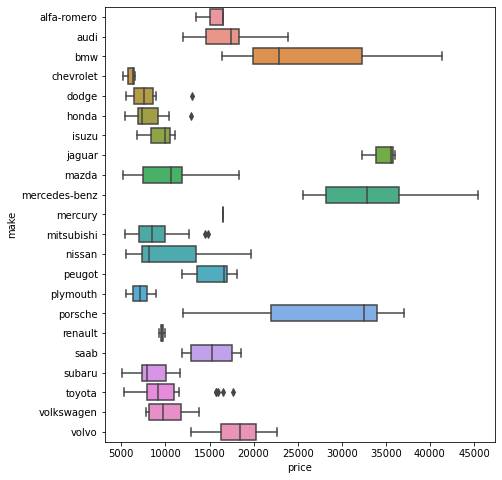

In [67]:
plt.figure(figsize=(7,8))
sns.boxplot(data=cars,x="price",y="make")
plt.show()

## 3) Handling categorical data

### Separating categorical and numerical data

In [68]:
cars_cat = cars.select_dtypes(object)
cars_num=cars.select_dtypes(['float64','int64'])

In [69]:
cars_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc


In [70]:
cars_num.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450


In [71]:
cars_cat['fuel-type'].value_counts()

gas       183
diesel     20
Name: fuel-type, dtype: int64

In [72]:
#one hot encoding: dummies
fuel_data=pd.get_dummies(cars_cat['fuel-type'])

In [73]:
fuel_data.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


# how to convert categorical parameters to numerical paramters


In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le= LabelEncoder()

In [77]:
le.fit_transform(cars_cat['make'])
#now the make is converted to numbers

array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,
        9,  9,  9,  9,  9,  9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 17, 17, 17, 17, 17, 17,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21])

In [79]:
for col in cars_cat:
    le=LabelEncoder()
    cars_cat[col]=le.fit_transform(cars_cat[col])

In [80]:
cars_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3


## 4) Skewness

In [81]:
cars_num.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450


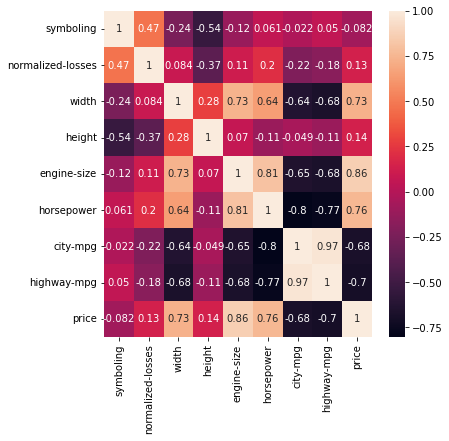

In [82]:
plt.figure(figsize=(6,6))
sns.heatmap(cars_num.corr(),annot=True)
plt.show()

In [83]:
from scipy.stats import skew

skewness:  0.8443855299694787


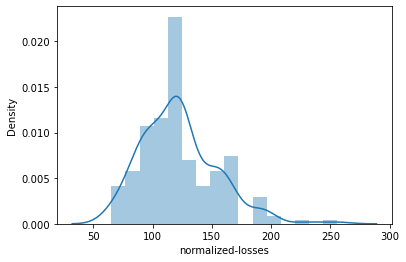

In [84]:
print("skewness: ",skew(cars_num["normalized-losses"]))
sns.distplot(cars_num["normalized-losses"])
plt.show()

In [85]:
# Removing skewness 
cars_num["normalized-losses"] = np.sqrt(cars_num["normalized-losses"])

skewness:  0.42362644855543496


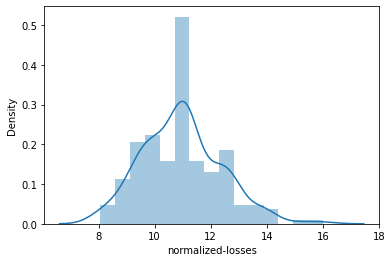

In [86]:
print("skewness: ",skew(cars_num["normalized-losses"]))
sns.distplot(cars_num["normalized-losses"])
plt.show()

### Merging categorical and numerical column

In [88]:
cars_new = pd.concat([cars_num,cars_cat],axis=1)

In [89]:
cars_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,11.045361,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0
1,3,11.045361,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0
2,1,11.045361,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5
3,2,12.806248,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3
4,2,12.806248,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3
